In [33]:
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook

In [34]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [35]:
import numpy as np

from datetime import timedelta
from datetime import datetime
from pprint import pprint

from opendrift.models.oceandrift import OceanDrift
from opendrift.models.oceandrift import Lagrangian3DArray
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.readers import reader_global_landmask
from opendrift.readers import reader_shape

In [ ]:
domain = [-49, -29, -48, -26]

In [36]:
data = reader_netCDF_CF_generic.Reader([
    '/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc',
#     '/data/global-reanalysis-phy-001-030-daily/02_3km_regrid_joined/grid_1999.nc',
#     '/data/global-reanalysis-phy-001-030-daily/02_3km_regrid_joined/grid_2000.nc',
#     '/data/global-reanalysis-phy-001-030-daily/02_3km_regrid_joined/grid_2001.nc',
#     '/data/global-reanalysis-phy-001-030-daily/02_3km_regrid_joined/grid_2002.nc'
])
reader_costao = reader_shape.Reader.from_shpfiles('/data/shapefiles/costoes/pol_diferenca_costao_terra_p14.shp')
reader_landmask = reader_global_landmask.Reader(extent=domain)  # lonmin, latmin, lonmax, latmax

15:07:47 INFO    opendrift.readers.reader_netCDF_CF_generic: Opening dataset: ['/data/global-reanalysis-phy-001-030-daily/01_9km_regrid_joined/grid_1998.nc']
15:07:47 INFO    opendrift.readers.reader_netCDF_CF_generic: Opening files with MFDataset
15:07:47 INFO    opendrift.readers.reader_netCDF_CF_generic: Grid coordinates are detected, but proj4 string not given: assuming latlong
15:07:47 INFO    opendrift.readers.basereader: Variable x_sea_water_velocity will be rotated from eastward_sea_water_velocity
15:07:47 INFO    opendrift.readers.basereader: Variable y_sea_water_velocity will be rotated from northward_sea_water_velocity
15:07:47 INFO    opendrift.readers.reader_shape: Pre-processing 45 geometries


In [43]:
#o = Tubastrea(loglevel=20)
o = Tubastrea()
o.disable_vertical_motion()
o.priority_list['land_binary_mask'] = ['global_landmask']
o.add_reader([data, reader_costao, reader_landmask])
o.reef_shapes = ['shape']
o.factor = 0.5

15:13:12 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.6.0)
15:13:12 WARNING opendrift.models.basemodel: ##################################################################################
15:13:12 WARNING opendrift.models.basemodel: Dependencies are outdated, please update with: conda env update -f environment.yml
15:13:12 WARNING opendrift.models.basemodel: ##################################################################################


In [44]:
start = datetime(1998, 3, 1, 0, 0, 0)
end = datetime(1998, 3, 31, 0, 0, 0)

# 2014;Rancho Norte (RN);-27.277.734;-48.374.985
# GPS corrected -48.381440; -27.277070
seed_rn = [-48.381440, -27.277070]
# 2012;Engenho (EG);-27.291.957;-48.367.384
seed_eg = [-48.367384, -27.291957]
# 2014;Vidal (SV);-27.297.548;-48.360.013
seed_sv = [-48.360013, -27.297548]
# 2013;Farol (SF);-27.296.645;-48.363.786
seed_sf = [-48.363786, -27.296645]
# 2015;Galé (GI);-2.717.785;-4.840.758
seed_gi = [-48.40758, -27.17785]

# Plataforma
# seed_plataforma = [-46.767264, -26.767222]
seed_plataforma = [-46.77, -26.767222]

# o.seed_elements(lon=seed_rn[0], lat=seed_rn[1], number=1000, radius=10, time=[start, start+timedelta(hours=12)])
# o.seed_elements(lon=seed_eg[0], lat=seed_eg[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o.seed_elements(lon=seed_sv[0], lat=seed_sv[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o.seed_elements(lon=seed_sf[0], lat=seed_sf[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o.seed_elements(lon=seed_gi[0], lat=seed_gi[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o.seed_elements(lon=seed_plataforma[0], lat=seed_plataforma[1], number=770, radius=1, time=[start, end])
o.seed_elements(lon=seed_rn[0], lat=seed_rn[1], number=180, radius=5, time=[start, end])
o.seed_elements(lon=seed_eg[0], lat=seed_eg[1], number=180, radius=5, time=[start, end])
o.seed_elements(lon=seed_sv[0], lat=seed_sv[1], number=180, radius=5, time=[start, end])
o.seed_elements(lon=seed_sf[0], lat=seed_sf[1], number=180, radius=5, time=[start, end])
o.seed_elements(lon=seed_gi[0], lat=seed_gi[1], number=180, radius=5, time=[start, end])

o.set_config('general:coastline_action', 'none')
o.set_config('general:use_auto_landmask', True)
# o.run(duration=timedelta(hours=288), time_step_output=3600, outfile= '/data/coral_sol_output.nc')
# o.run(duration=timedelta(hours=72), time_step=3600, time_step_output=3600)
o.run(end_time=end, time_step=timedelta(hours=1))

15:13:14 INFO    opendrift.models.basemodel: Using existing reader for land_binary_mask
15:13:14 INFO    opendrift.models.basemodel: Moving 554 out of 900 points from land to water
15:13:14 INFO    opendrift.models.basemodel: 1998-03-01 00:00:00 - step 1 of 720 - 5 active elements (0 deactivated)
15:13:14 INFO    opendrift.models.basemodel: 1998-03-01 01:00:00 - step 2 of 720 - 5 active elements (0 deactivated)
15:13:14 INFO    opendrift.models.basemodel: 1998-03-01 02:00:00 - step 3 of 720 - 1 active elements (4 deactivated)
15:13:14 INFO    opendrift.models.basemodel: 1998-03-01 03:00:00 - step 4 of 720 - 1 active elements (4 deactivated)
15:13:15 INFO    opendrift.models.basemodel: 1998-03-01 04:00:00 - step 5 of 720 - 6 active elements (4 deactivated)
15:13:15 INFO    opendrift.models.basemodel: 1998-03-01 05:00:00 - step 6 of 720 - 6 active elements (4 deactivated)
15:13:15 INFO    opendrift.models.basemodel: 1998-03-01 06:00:00 - step 7 of 720 - 2 active elements (8 deactivated)


15:13:16 INFO    opendrift.models.basemodel: 1998-03-03 20:00:00 - step 69 of 720 - 18 active elements (72 deactivated)
15:13:16 INFO    opendrift.models.basemodel: 1998-03-03 21:00:00 - step 70 of 720 - 18 active elements (72 deactivated)
15:13:16 INFO    opendrift.models.basemodel: 1998-03-03 22:00:00 - step 71 of 720 - 14 active elements (76 deactivated)
15:13:16 INFO    opendrift.models.basemodel: 1998-03-03 23:00:00 - step 72 of 720 - 14 active elements (76 deactivated)
15:13:16 INFO    opendrift.models.basemodel: 1998-03-04 00:00:00 - step 73 of 720 - 19 active elements (76 deactivated)
15:13:16 INFO    opendrift.models.basemodel: 1998-03-04 01:00:00 - step 74 of 720 - 19 active elements (76 deactivated)
15:13:16 INFO    opendrift.models.basemodel: 1998-03-04 02:00:00 - step 75 of 720 - 15 active elements (80 deactivated)
15:13:16 INFO    opendrift.models.basemodel: 1998-03-04 03:00:00 - step 76 of 720 - 15 active elements (80 deactivated)
15:13:16 INFO    opendrift.models.basemo

15:13:18 INFO    opendrift.models.basemodel: 1998-03-06 16:00:00 - step 137 of 720 - 56 active elements (119 deactivated)
15:13:18 INFO    opendrift.models.basemodel: 1998-03-06 17:00:00 - step 138 of 720 - 56 active elements (119 deactivated)
15:13:18 INFO    opendrift.models.basemodel: 1998-03-06 18:00:00 - step 139 of 720 - 55 active elements (120 deactivated)
15:13:18 INFO    opendrift.models.basemodel: 1998-03-06 19:00:00 - step 140 of 720 - 55 active elements (120 deactivated)
15:13:18 INFO    opendrift.models.basemodel: 1998-03-06 20:00:00 - step 141 of 720 - 60 active elements (120 deactivated)
15:13:18 INFO    opendrift.models.basemodel: 1998-03-06 21:00:00 - step 142 of 720 - 60 active elements (120 deactivated)
15:13:18 INFO    opendrift.models.basemodel: 1998-03-06 22:00:00 - step 143 of 720 - 59 active elements (121 deactivated)
15:13:18 INFO    opendrift.models.basemodel: 1998-03-06 23:00:00 - step 144 of 720 - 59 active elements (121 deactivated)
15:13:18 INFO    opendri

15:13:19 INFO    opendrift.models.basemodel: 1998-03-09 12:00:00 - step 205 of 720 - 94 active elements (161 deactivated)
15:13:19 INFO    opendrift.models.basemodel: 1998-03-09 13:00:00 - step 206 of 720 - 99 active elements (161 deactivated)
15:13:19 INFO    opendrift.models.basemodel: 1998-03-09 14:00:00 - step 207 of 720 - 99 active elements (161 deactivated)
15:13:19 INFO    opendrift.models.basemodel: 1998-03-09 15:00:00 - step 208 of 720 - 95 active elements (165 deactivated)
15:13:19 INFO    opendrift.models.basemodel: 1998-03-09 16:00:00 - step 209 of 720 - 94 active elements (166 deactivated)
15:13:20 INFO    opendrift.models.basemodel: 1998-03-09 17:00:00 - step 210 of 720 - 99 active elements (166 deactivated)
15:13:20 INFO    opendrift.models.basemodel: 1998-03-09 18:00:00 - step 211 of 720 - 99 active elements (166 deactivated)
15:13:20 INFO    opendrift.models.basemodel: 1998-03-09 19:00:00 - step 212 of 720 - 95 active elements (170 deactivated)
15:13:20 INFO    opendri

15:13:21 INFO    opendrift.models.basemodel: 1998-03-12 07:00:00 - step 272 of 720 - 124 active elements (216 deactivated)
15:13:21 INFO    opendrift.models.basemodel: 1998-03-12 08:00:00 - step 273 of 720 - 123 active elements (217 deactivated)
15:13:21 INFO    opendrift.models.basemodel: 1998-03-12 09:00:00 - step 274 of 720 - 128 active elements (217 deactivated)
15:13:21 INFO    opendrift.models.basemodel: 1998-03-12 10:00:00 - step 275 of 720 - 127 active elements (218 deactivated)
15:13:21 INFO    opendrift.models.basemodel: 1998-03-12 11:00:00 - step 276 of 720 - 125 active elements (220 deactivated)
15:13:21 INFO    opendrift.models.basemodel: 1998-03-12 12:00:00 - step 277 of 720 - 124 active elements (221 deactivated)
15:13:21 INFO    opendrift.models.basemodel: 1998-03-12 13:00:00 - step 278 of 720 - 129 active elements (221 deactivated)
15:13:21 INFO    opendrift.models.basemodel: 1998-03-12 14:00:00 - step 279 of 720 - 129 active elements (221 deactivated)
15:13:21 INFO   

15:13:23 INFO    opendrift.models.basemodel: 1998-03-15 02:00:00 - step 339 of 720 - 141 active elements (284 deactivated)
15:13:23 INFO    opendrift.models.basemodel: 1998-03-15 03:00:00 - step 340 of 720 - 138 active elements (287 deactivated)
15:13:23 INFO    opendrift.models.basemodel: 1998-03-15 04:00:00 - step 341 of 720 - 138 active elements (287 deactivated)
15:13:23 INFO    opendrift.models.basemodel: 1998-03-15 05:00:00 - step 342 of 720 - 143 active elements (287 deactivated)
15:13:23 INFO    opendrift.models.basemodel: 1998-03-15 06:00:00 - step 343 of 720 - 143 active elements (287 deactivated)
15:13:23 INFO    opendrift.models.basemodel: 1998-03-15 07:00:00 - step 344 of 720 - 141 active elements (289 deactivated)
15:13:23 INFO    opendrift.models.basemodel: 1998-03-15 08:00:00 - step 345 of 720 - 139 active elements (291 deactivated)
15:13:23 INFO    opendrift.models.basemodel: 1998-03-15 09:00:00 - step 346 of 720 - 144 active elements (291 deactivated)
15:13:23 INFO   

15:13:24 INFO    opendrift.models.basemodel: 1998-03-17 21:00:00 - step 406 of 720 - 141 active elements (364 deactivated)
15:13:24 INFO    opendrift.models.basemodel: 1998-03-17 22:00:00 - step 407 of 720 - 145 active elements (365 deactivated)
15:13:24 INFO    opendrift.models.basemodel: 1998-03-17 23:00:00 - step 408 of 720 - 145 active elements (365 deactivated)
15:13:25 INFO    opendrift.models.basemodel: 1998-03-18 00:00:00 - step 409 of 720 - 141 active elements (369 deactivated)
15:13:25 INFO    opendrift.models.basemodel: 1998-03-18 01:00:00 - step 410 of 720 - 141 active elements (369 deactivated)
15:13:25 INFO    opendrift.models.basemodel: 1998-03-18 02:00:00 - step 411 of 720 - 145 active elements (370 deactivated)
15:13:25 INFO    opendrift.models.basemodel: 1998-03-18 03:00:00 - step 412 of 720 - 145 active elements (370 deactivated)
15:13:25 INFO    opendrift.models.basemodel: 1998-03-18 04:00:00 - step 413 of 720 - 141 active elements (374 deactivated)
15:13:25 INFO   

15:13:26 INFO    opendrift.models.basemodel: 1998-03-20 16:00:00 - step 473 of 720 - 115 active elements (475 deactivated)
15:13:26 INFO    opendrift.models.basemodel: 1998-03-20 17:00:00 - step 474 of 720 - 114 active elements (476 deactivated)
15:13:26 INFO    opendrift.models.basemodel: 1998-03-20 18:00:00 - step 475 of 720 - 118 active elements (477 deactivated)
15:13:26 INFO    opendrift.models.basemodel: 1998-03-20 19:00:00 - step 476 of 720 - 117 active elements (478 deactivated)
15:13:26 INFO    opendrift.models.basemodel: 1998-03-20 20:00:00 - step 477 of 720 - 113 active elements (482 deactivated)
15:13:26 INFO    opendrift.models.basemodel: 1998-03-20 21:00:00 - step 478 of 720 - 113 active elements (482 deactivated)
15:13:26 INFO    opendrift.models.basemodel: 1998-03-20 22:00:00 - step 479 of 720 - 118 active elements (482 deactivated)
15:13:26 INFO    opendrift.models.basemodel: 1998-03-20 23:00:00 - step 480 of 720 - 118 active elements (482 deactivated)
15:13:26 INFO   

15:13:28 INFO    opendrift.models.basemodel: 1998-03-23 06:00:00 - step 535 of 720 - 107 active elements (563 deactivated)
15:13:28 INFO    opendrift.models.basemodel: 1998-03-23 07:00:00 - step 536 of 720 - 107 active elements (563 deactivated)
15:13:28 INFO    opendrift.models.basemodel: 1998-03-23 08:00:00 - step 537 of 720 - 103 active elements (567 deactivated)
15:13:28 INFO    opendrift.models.basemodel: 1998-03-23 09:00:00 - step 538 of 720 - 103 active elements (567 deactivated)
15:13:28 INFO    opendrift.models.basemodel: 1998-03-23 10:00:00 - step 539 of 720 - 108 active elements (567 deactivated)
15:13:28 INFO    opendrift.models.basemodel: 1998-03-23 11:00:00 - step 540 of 720 - 108 active elements (567 deactivated)
15:13:28 INFO    opendrift.models.basemodel: 1998-03-23 12:00:00 - step 541 of 720 - 104 active elements (571 deactivated)
15:13:28 INFO    opendrift.models.basemodel: 1998-03-23 13:00:00 - step 542 of 720 - 104 active elements (571 deactivated)
15:13:28 WARNING

15:13:29 INFO    opendrift.models.basemodel: 1998-03-25 15:00:00 - step 592 of 720 - 98 active elements (642 deactivated)
15:13:29 INFO    opendrift.models.basemodel: 1998-03-25 16:00:00 - step 593 of 720 - 98 active elements (642 deactivated)
15:13:29 INFO    opendrift.models.basemodel: 1998-03-25 17:00:00 - step 594 of 720 - 98 active elements (642 deactivated)
15:13:29 INFO    opendrift.models.basemodel: 1998-03-25 18:00:00 - step 595 of 720 - 98 active elements (642 deactivated)
15:13:29 INFO    opendrift.models.basemodel: 1998-03-25 19:00:00 - step 596 of 720 - 103 active elements (642 deactivated)
15:13:29 INFO    opendrift.models.basemodel: 1998-03-25 20:00:00 - step 597 of 720 - 103 active elements (642 deactivated)
15:13:29 INFO    opendrift.models.basemodel: 1998-03-25 21:00:00 - step 598 of 720 - 103 active elements (642 deactivated)
15:13:29 INFO    opendrift.models.basemodel: 1998-03-25 22:00:00 - step 599 of 720 - 103 active elements (642 deactivated)
15:13:29 INFO    ope

15:13:31 INFO    opendrift.models.basemodel: 1998-03-28 10:00:00 - step 659 of 720 - 156 active elements (664 deactivated)
15:13:31 INFO    opendrift.models.basemodel: 1998-03-28 11:00:00 - step 660 of 720 - 161 active elements (664 deactivated)
15:13:31 INFO    opendrift.models.basemodel: 1998-03-28 12:00:00 - step 661 of 720 - 161 active elements (664 deactivated)
15:13:31 INFO    opendrift.models.basemodel: 1998-03-28 13:00:00 - step 662 of 720 - 158 active elements (667 deactivated)
15:13:31 INFO    opendrift.models.basemodel: 1998-03-28 14:00:00 - step 663 of 720 - 158 active elements (667 deactivated)
15:13:31 INFO    opendrift.models.basemodel: 1998-03-28 15:00:00 - step 664 of 720 - 163 active elements (667 deactivated)
15:13:31 INFO    opendrift.models.basemodel: 1998-03-28 16:00:00 - step 665 of 720 - 161 active elements (669 deactivated)
15:13:31 INFO    opendrift.models.basemodel: 1998-03-28 17:00:00 - step 666 of 720 - 158 active elements (672 deactivated)
15:13:31 INFO   

<IPython.core.display.Javascript object>


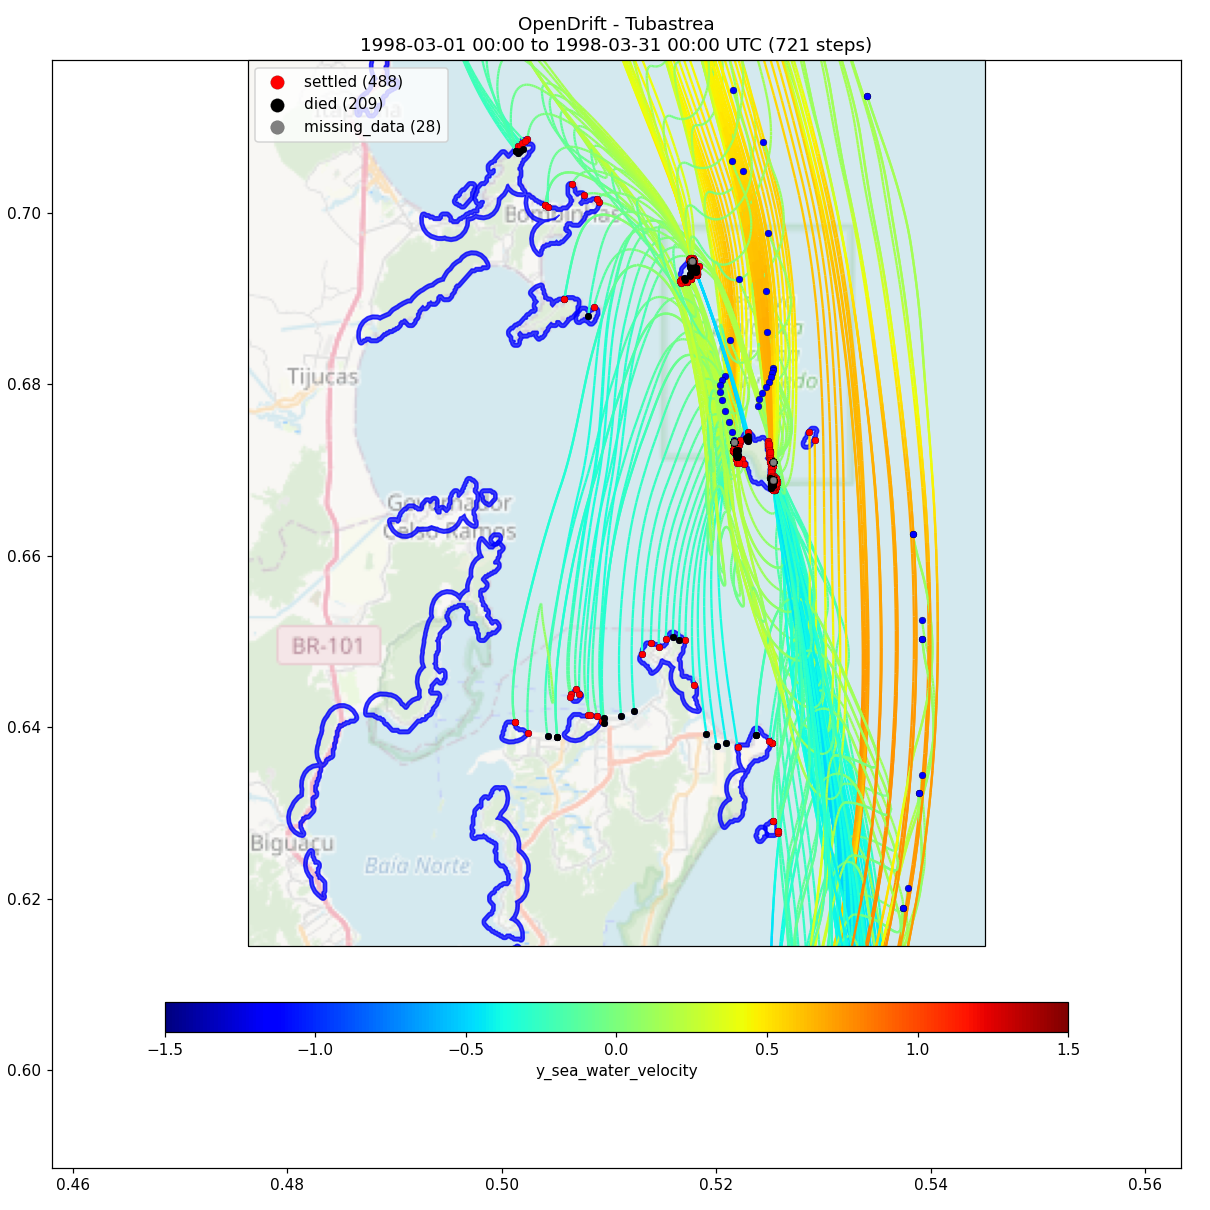

In [45]:
o.plot_costoes(corners=domain, linecolor='y_sea_water_velocity', lvmin=-1.5, lvmax=1.5)

<IPython.core.display.Javascript object>


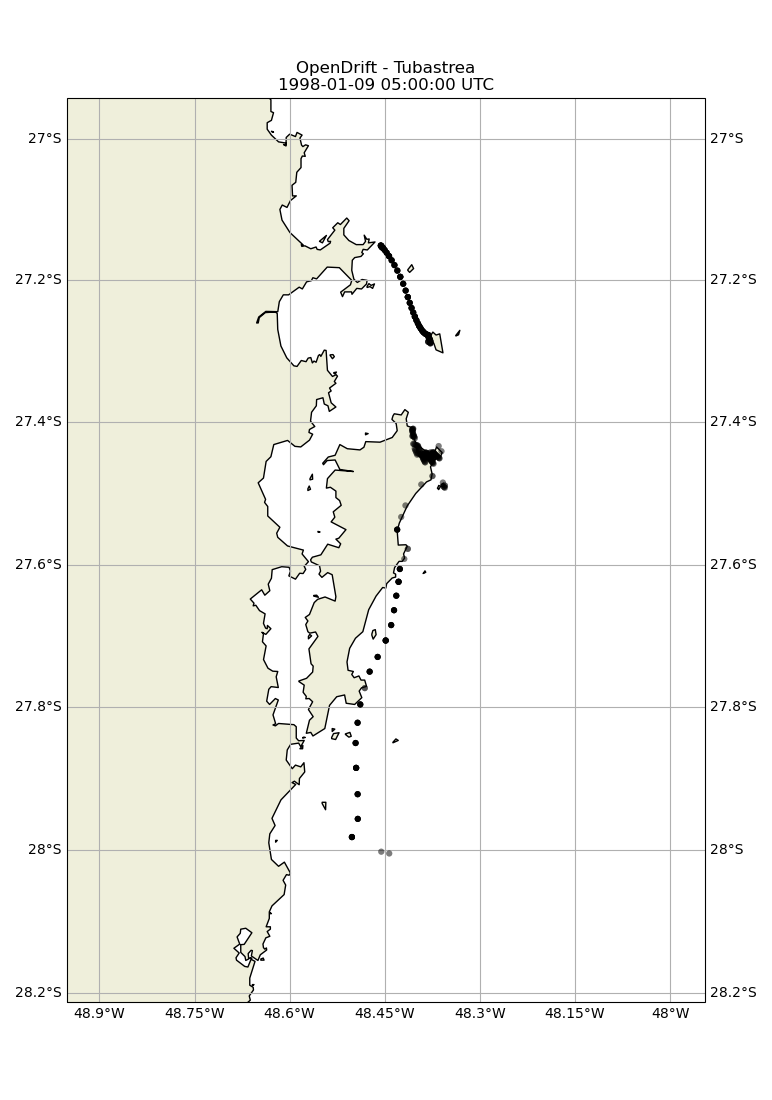

17:55:44 INFO    opendrift.models.basemodel: Saving animation to teste.gif...
17:55:44 INFO    opendrift.models.basemodel: Making animated gif...
MovieWriter stderr:
convert-im6.q16: no images defined `teste.gif' @ error/convert.c/ConvertImageCommand/3258.

17:57:12 INFO    opendrift.models.basemodel: Could not save animation:
17:57:12 INFO    opendrift.models.basemodel: Command '['convert', '-size', '772x1100', '-depth', '8', '-delay', '12.5', '-loop', '0', 'rgba:-', 'teste.gif']' returned non-zero exit status 1.


In [12]:
domain = [-49, -48, -28, -27]
# o.plot(corners=domain, linecolor='y_sea_water_velocity', lvmin=-1.5, lvmax=1.5)
o.animation(filename='teste.gif', linecolor='temp')

In [17]:
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature
#cmap = ListedColormap(('blue', 'red'))
cmap = ListedColormap((cfeature.COLORS['water'],
                       cfeature.COLORS['land']))

o1 = CoralSol(loglevel=20)
o1.add_reader([data])
o1.seed_elements(lon=seed_rn[0], lat=seed_rn[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
o1.set_config('general:use_auto_landmask', True)
o1.run(end_time=data.start_time+timedelta(hours=24), time_step=1800, time_step_output=2*3600)

# o2 = CoralSol(loglevel=20)
# o2.add_reader([data, reader_costao])
# o2.seed_elements(lon=seed_rn[0], lat=seed_rn[1], number=100, radius=10, time=[start, start+timedelta(hours=4)])
# o2.set_config('general:use_auto_landmask', False)
# o2.run(duration=timedelta(hours=54))

22:34:31 INFO: OpenDriftSimulation initialised (version 1.4.2)
22:34:31 INFO: Adding a dynamical landmask with max. priority based on assumed maximum speed of 0.5 m/s. Adding a customised landmask may be faster...
22:34:36 INFO: Using existing reader for land_binary_mask
22:34:38 INFO: All points are in ocean
22:34:41 INFO: 1993-01-01 12:00:00 - step 1 of 298080 - 13 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 12:30:00 - step 2 of 298080 - 25 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 13:00:00 - step 3 of 298080 - 38 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 13:30:00 - step 4 of 298080 - 50 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 14:00:00 - step 5 of 298080 - 62 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 14:30:00 - step 6 of 298080 - 75 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 15:00:00 - step 7 of 298080 - 87 active elements (0 deactivated)
22:34:41 INFO: 1993-01-01 15:30:00 - step 8 of 29808

22:34:41 INFO: 1993-01-03 06:30:00 - step 86 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 07:00:00 - step 87 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 07:30:00 - step 88 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 08:00:00 - step 89 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 08:30:00 - step 90 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 09:00:00 - step 91 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 09:30:00 - step 92 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 10:00:00 - step 93 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 10:30:00 - step 94 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 11:00:00 - step 95 of 298080 - 100 active elements (0 deactivated)
22:34:41 INFO: 1993-01-03 11:30:00 - step 96 of 298080 - 100 active el

22:34:42 INFO: 1993-01-05 02:30:00 - step 174 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 03:00:00 - step 175 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 03:30:00 - step 176 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 04:00:00 - step 177 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 04:30:00 - step 178 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 05:00:00 - step 179 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 05:30:00 - step 180 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 06:00:00 - step 181 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 06:30:00 - step 182 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 07:00:00 - step 183 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-05 07:30:00 - step 184 of 298080 - 10

22:34:42 INFO: 1993-01-06 22:30:00 - step 262 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-06 23:00:00 - step 263 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-06 23:30:00 - step 264 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 00:00:00 - step 265 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 00:30:00 - step 266 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 01:00:00 - step 267 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 01:30:00 - step 268 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 02:00:00 - step 269 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 02:30:00 - step 270 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 03:00:00 - step 271 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-07 03:30:00 - step 272 of 298080 - 10

22:34:42 INFO: 1993-01-08 18:30:00 - step 350 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 19:00:00 - step 351 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 19:30:00 - step 352 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 20:00:00 - step 353 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 20:30:00 - step 354 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 21:00:00 - step 355 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 21:30:00 - step 356 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 22:00:00 - step 357 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 22:30:00 - step 358 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 23:00:00 - step 359 of 298080 - 100 active elements (0 deactivated)
22:34:42 INFO: 1993-01-08 23:30:00 - step 360 of 298080 - 10

22:34:43 INFO: 1993-01-10 14:30:00 - step 438 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 15:00:00 - step 439 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 15:30:00 - step 440 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 16:00:00 - step 441 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 16:30:00 - step 442 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 17:00:00 - step 443 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 17:30:00 - step 444 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 18:00:00 - step 445 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 18:30:00 - step 446 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 19:00:00 - step 447 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-10 19:30:00 - step 448 of 298080 - 10

22:34:43 INFO: 1993-01-12 10:30:00 - step 526 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 11:00:00 - step 527 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 11:30:00 - step 528 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 12:00:00 - step 529 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 12:30:00 - step 530 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 13:00:00 - step 531 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 13:30:00 - step 532 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 14:00:00 - step 533 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 14:30:00 - step 534 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 15:00:00 - step 535 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-12 15:30:00 - step 536 of 298080 - 10

22:34:43 INFO: 1993-01-14 06:30:00 - step 614 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 07:00:00 - step 615 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 07:30:00 - step 616 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 08:00:00 - step 617 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 08:30:00 - step 618 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 09:00:00 - step 619 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 09:30:00 - step 620 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 10:00:00 - step 621 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 10:30:00 - step 622 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 11:00:00 - step 623 of 298080 - 100 active elements (0 deactivated)
22:34:43 INFO: 1993-01-14 11:30:00 - step 624 of 298080 - 10

22:34:44 INFO: 1993-01-16 02:30:00 - step 702 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 03:00:00 - step 703 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 03:30:00 - step 704 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 04:00:00 - step 705 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 04:30:00 - step 706 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 05:00:00 - step 707 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 05:30:00 - step 708 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 06:00:00 - step 709 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 06:30:00 - step 710 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 07:00:00 - step 711 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-16 07:30:00 - step 712 of 298080 - 10

22:34:44 INFO: 1993-01-17 22:30:00 - step 790 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-17 23:00:00 - step 791 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-17 23:30:00 - step 792 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 00:00:00 - step 793 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 00:30:00 - step 794 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 01:00:00 - step 795 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 01:30:00 - step 796 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 02:00:00 - step 797 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 02:30:00 - step 798 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 03:00:00 - step 799 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-18 03:30:00 - step 800 of 298080 - 10

22:34:44 INFO: 1993-01-19 18:30:00 - step 878 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 19:00:00 - step 879 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 19:30:00 - step 880 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 20:00:00 - step 881 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 20:30:00 - step 882 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 21:00:00 - step 883 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 21:30:00 - step 884 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 22:00:00 - step 885 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 22:30:00 - step 886 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 23:00:00 - step 887 of 298080 - 100 active elements (0 deactivated)
22:34:44 INFO: 1993-01-19 23:30:00 - step 888 of 298080 - 10

22:34:45 INFO: 1993-01-21 14:30:00 - step 966 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 15:00:00 - step 967 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 15:30:00 - step 968 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 16:00:00 - step 969 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 16:30:00 - step 970 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 17:00:00 - step 971 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 17:30:00 - step 972 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 18:00:00 - step 973 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 18:30:00 - step 974 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 19:00:00 - step 975 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-21 19:30:00 - step 976 of 298080 - 10

22:34:45 INFO: 1993-01-23 10:00:00 - step 1053 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 10:30:00 - step 1054 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 11:00:00 - step 1055 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 11:30:00 - step 1056 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 12:00:00 - step 1057 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 12:30:00 - step 1058 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 13:00:00 - step 1059 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 13:30:00 - step 1060 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 14:00:00 - step 1061 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 14:30:00 - step 1062 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-23 15:00:00 - step 1063 of 

22:34:45 INFO: 1993-01-25 05:30:00 - step 1140 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 06:00:00 - step 1141 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 06:30:00 - step 1142 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 07:00:00 - step 1143 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 07:30:00 - step 1144 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 08:00:00 - step 1145 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 08:30:00 - step 1146 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 09:00:00 - step 1147 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 09:30:00 - step 1148 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 10:00:00 - step 1149 of 298080 - 100 active elements (0 deactivated)
22:34:45 INFO: 1993-01-25 10:30:00 - step 1150 of 

22:34:46 INFO: 1993-01-27 01:00:00 - step 1227 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 01:30:00 - step 1228 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 02:00:00 - step 1229 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 02:30:00 - step 1230 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 03:00:00 - step 1231 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 03:30:00 - step 1232 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 04:00:00 - step 1233 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 04:30:00 - step 1234 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 05:00:00 - step 1235 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 05:30:00 - step 1236 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-27 06:00:00 - step 1237 of 

22:34:46 INFO: 1993-01-28 20:30:00 - step 1314 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 21:00:00 - step 1315 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 21:30:00 - step 1316 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 22:00:00 - step 1317 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 22:30:00 - step 1318 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 23:00:00 - step 1319 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-28 23:30:00 - step 1320 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-29 00:00:00 - step 1321 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-29 00:30:00 - step 1322 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-29 01:00:00 - step 1323 of 298080 - 100 active elements (0 deactivated)
22:34:46 INFO: 1993-01-29 01:30:00 - step 1324 of 

22:34:47 INFO: 1993-01-30 16:00:00 - step 1401 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 16:30:00 - step 1402 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 17:00:00 - step 1403 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 17:30:00 - step 1404 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 18:00:00 - step 1405 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 18:30:00 - step 1406 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 19:00:00 - step 1407 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 19:30:00 - step 1408 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 20:00:00 - step 1409 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 20:30:00 - step 1410 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-01-30 21:00:00 - step 1411 of 

22:34:47 INFO: 1993-02-01 11:30:00 - step 1488 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 12:00:00 - step 1489 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 12:30:00 - step 1490 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 13:00:00 - step 1491 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 13:30:00 - step 1492 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 14:00:00 - step 1493 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 14:30:00 - step 1494 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 15:00:00 - step 1495 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 15:30:00 - step 1496 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 16:00:00 - step 1497 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-01 16:30:00 - step 1498 of 

22:34:47 INFO: 1993-02-03 07:00:00 - step 1575 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 07:30:00 - step 1576 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 08:00:00 - step 1577 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 08:30:00 - step 1578 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 09:00:00 - step 1579 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 09:30:00 - step 1580 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 10:00:00 - step 1581 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 10:30:00 - step 1582 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 11:00:00 - step 1583 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 11:30:00 - step 1584 of 298080 - 100 active elements (0 deactivated)
22:34:47 INFO: 1993-02-03 12:00:00 - step 1585 of 

22:34:48 INFO: 1993-02-05 02:30:00 - step 1662 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 03:00:00 - step 1663 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 03:30:00 - step 1664 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 04:00:00 - step 1665 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 04:30:00 - step 1666 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 05:00:00 - step 1667 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 05:30:00 - step 1668 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 06:00:00 - step 1669 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 06:30:00 - step 1670 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 07:00:00 - step 1671 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-05 07:30:00 - step 1672 of 

22:34:48 INFO: 1993-02-06 22:00:00 - step 1749 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-06 22:30:00 - step 1750 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-06 23:00:00 - step 1751 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-06 23:30:00 - step 1752 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 00:00:00 - step 1753 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 00:30:00 - step 1754 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 01:00:00 - step 1755 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 01:30:00 - step 1756 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 02:00:00 - step 1757 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 02:30:00 - step 1758 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-07 03:00:00 - step 1759 of 

22:34:48 INFO: 1993-02-08 17:30:00 - step 1836 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 18:00:00 - step 1837 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 18:30:00 - step 1838 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 19:00:00 - step 1839 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 19:30:00 - step 1840 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 20:00:00 - step 1841 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 20:30:00 - step 1842 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 21:00:00 - step 1843 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 21:30:00 - step 1844 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 22:00:00 - step 1845 of 298080 - 100 active elements (0 deactivated)
22:34:48 INFO: 1993-02-08 22:30:00 - step 1846 of 

22:34:49 INFO: 1993-02-10 13:00:00 - step 1923 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 13:30:00 - step 1924 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 14:00:00 - step 1925 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 14:30:00 - step 1926 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 15:00:00 - step 1927 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 15:30:00 - step 1928 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 16:00:00 - step 1929 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 16:30:00 - step 1930 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 17:00:00 - step 1931 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 17:30:00 - step 1932 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-10 18:00:00 - step 1933 of 

22:34:49 INFO: 1993-02-12 08:30:00 - step 2010 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 09:00:00 - step 2011 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 09:30:00 - step 2012 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 10:00:00 - step 2013 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 10:30:00 - step 2014 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 11:00:00 - step 2015 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 11:30:00 - step 2016 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 12:00:00 - step 2017 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 12:30:00 - step 2018 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 13:00:00 - step 2019 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-12 13:30:00 - step 2020 of 

22:34:49 INFO: 1993-02-14 04:00:00 - step 2097 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 04:30:00 - step 2098 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 05:00:00 - step 2099 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 05:30:00 - step 2100 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 06:00:00 - step 2101 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 06:30:00 - step 2102 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 07:00:00 - step 2103 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 07:30:00 - step 2104 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 08:00:00 - step 2105 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 08:30:00 - step 2106 of 298080 - 100 active elements (0 deactivated)
22:34:49 INFO: 1993-02-14 09:00:00 - step 2107 of 

22:34:50 INFO: 1993-02-15 23:30:00 - step 2184 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 00:00:00 - step 2185 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 00:30:00 - step 2186 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 01:00:00 - step 2187 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 01:30:00 - step 2188 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 02:00:00 - step 2189 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 02:30:00 - step 2190 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 03:00:00 - step 2191 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 03:30:00 - step 2192 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 04:00:00 - step 2193 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-16 04:30:00 - step 2194 of 

22:34:50 INFO: 1993-02-17 19:00:00 - step 2271 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 19:30:00 - step 2272 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 20:00:00 - step 2273 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 20:30:00 - step 2274 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 21:00:00 - step 2275 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 21:30:00 - step 2276 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 22:00:00 - step 2277 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 22:30:00 - step 2278 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 23:00:00 - step 2279 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-17 23:30:00 - step 2280 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-18 00:00:00 - step 2281 of 

22:34:50 INFO: 1993-02-19 14:30:00 - step 2358 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 15:00:00 - step 2359 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 15:30:00 - step 2360 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 16:00:00 - step 2361 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 16:30:00 - step 2362 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 17:00:00 - step 2363 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 17:30:00 - step 2364 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 18:00:00 - step 2365 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 18:30:00 - step 2366 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 19:00:00 - step 2367 of 298080 - 100 active elements (0 deactivated)
22:34:50 INFO: 1993-02-19 19:30:00 - step 2368 of 

22:34:51 INFO: 1993-02-21 10:00:00 - step 2445 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 10:30:00 - step 2446 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 11:00:00 - step 2447 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 11:30:00 - step 2448 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 12:00:00 - step 2449 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 12:30:00 - step 2450 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 13:00:00 - step 2451 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 13:30:00 - step 2452 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 14:00:00 - step 2453 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 14:30:00 - step 2454 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-21 15:00:00 - step 2455 of 

22:34:51 INFO: 1993-02-23 05:30:00 - step 2532 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 06:00:00 - step 2533 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 06:30:00 - step 2534 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 07:00:00 - step 2535 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 07:30:00 - step 2536 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 08:00:00 - step 2537 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 08:30:00 - step 2538 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 09:00:00 - step 2539 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 09:30:00 - step 2540 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 10:00:00 - step 2541 of 298080 - 100 active elements (0 deactivated)
22:34:51 INFO: 1993-02-23 10:30:00 - step 2542 of 

22:34:51 INFO: 1993-02-25 01:00:00 - step 2619 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 01:30:00 - step 2620 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 02:00:00 - step 2621 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 02:30:00 - step 2622 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 03:00:00 - step 2623 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 03:30:00 - step 2624 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 04:00:00 - step 2625 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 04:30:00 - step 2626 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 05:00:00 - step 2627 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 05:30:00 - step 2628 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-25 06:00:00 - step 2629 of 

22:34:52 INFO: 1993-02-26 20:30:00 - step 2706 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 21:00:00 - step 2707 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 21:30:00 - step 2708 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 22:00:00 - step 2709 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 22:30:00 - step 2710 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 23:00:00 - step 2711 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-26 23:30:00 - step 2712 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-27 00:00:00 - step 2713 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-27 00:30:00 - step 2714 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-27 01:00:00 - step 2715 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-27 01:30:00 - step 2716 of 

22:34:52 INFO: 1993-02-28 16:00:00 - step 2793 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 16:30:00 - step 2794 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 17:00:00 - step 2795 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 17:30:00 - step 2796 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 18:00:00 - step 2797 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 18:30:00 - step 2798 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 19:00:00 - step 2799 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 19:30:00 - step 2800 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 20:00:00 - step 2801 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 20:30:00 - step 2802 of 298080 - 100 active elements (0 deactivated)
22:34:52 INFO: 1993-02-28 21:00:00 - step 2803 of 

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


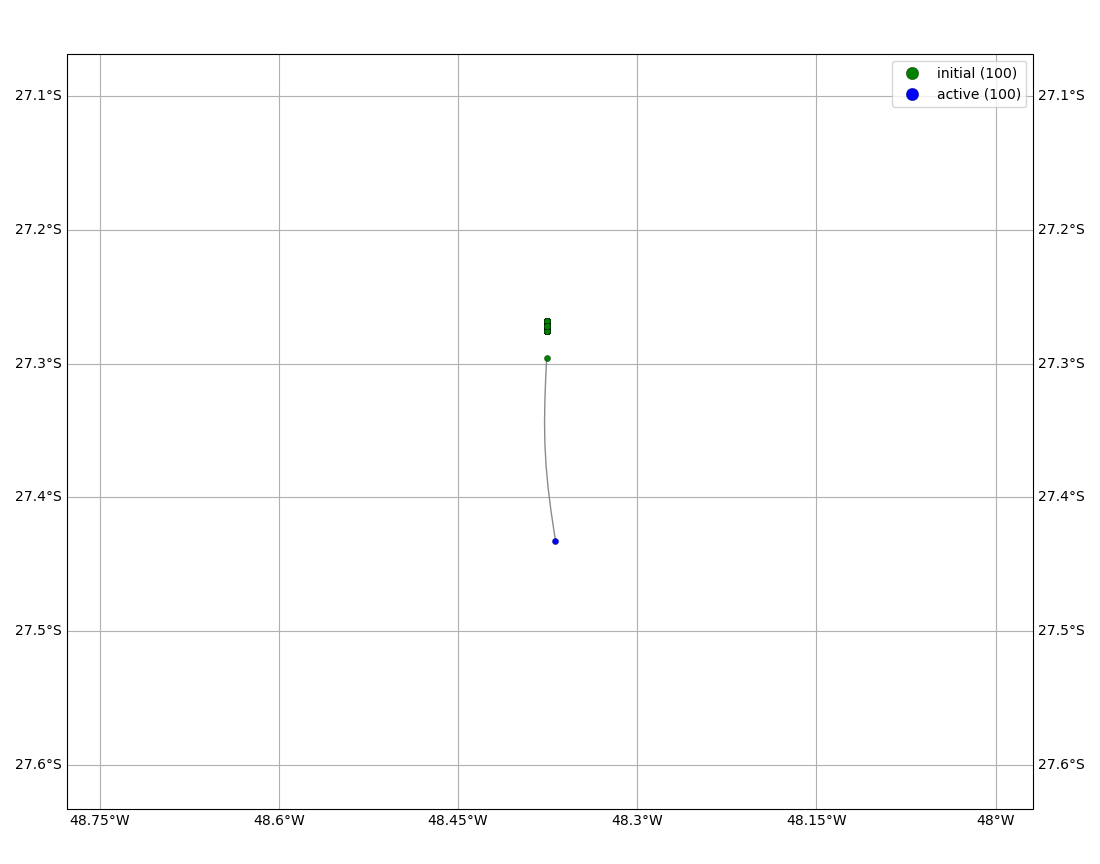

KeyError: 'x'

In [63]:
o1.plot(background='land_binary_mask', hide_landmask=True, cmap=cmap)

<IPython.core.display.Javascript object>


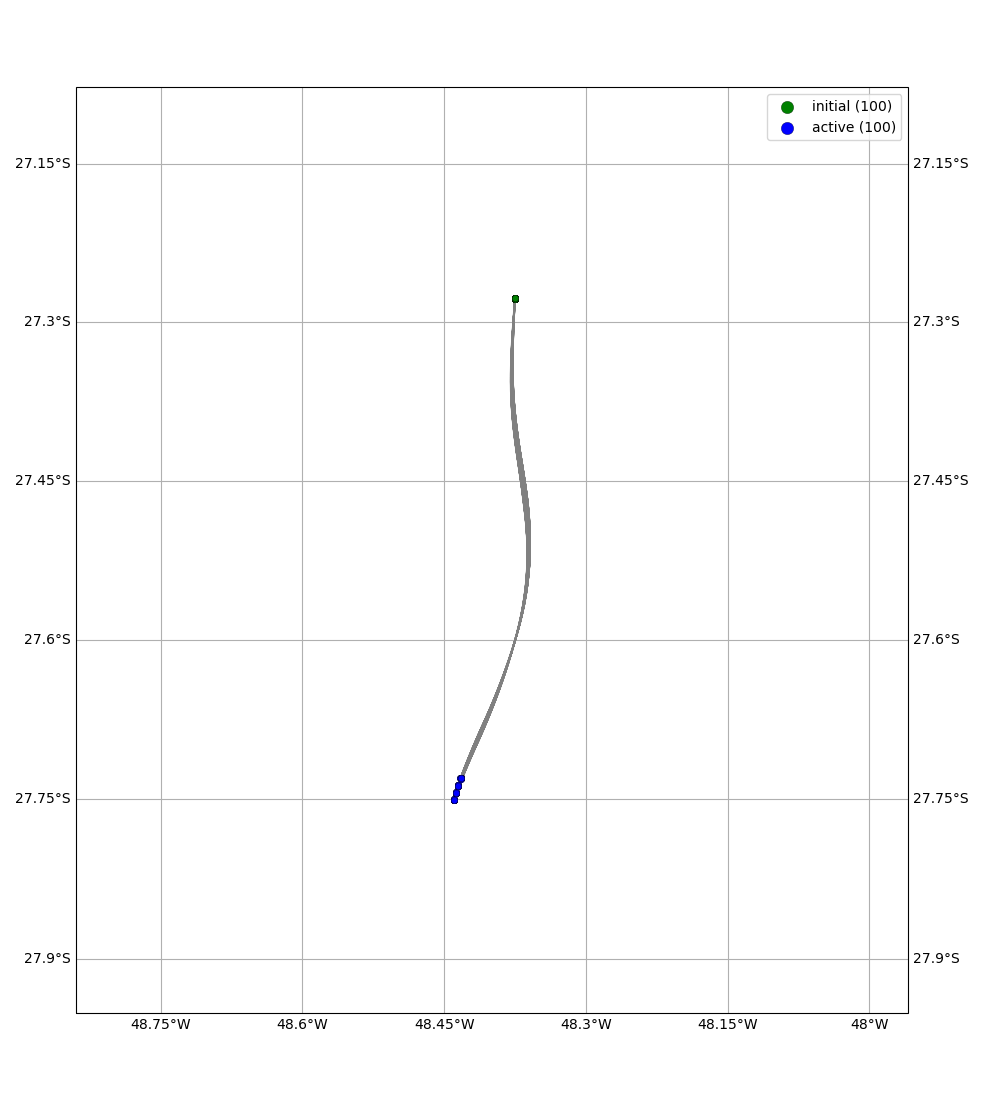

TypeError: '>=' not supported between instances of 'datetime.datetime' and 'NoneType'

In [47]:
o2.plot(background=['land_binary_mask'], hide_landmask=True, cmap=cmap)

In [11]:
jibe_rate = -np.log(1-0.04)/3600
jibe_rate

1.1339442922293102e-05

In [73]:
dir(o.readers['shape'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__on_land__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_variables',
 'always_valid',
 'buffer',
 'calculate_derived_environment_variables',
 'check_arguments',
 'clip_boundary_pixels',
 'coverage_string',
 'covers_positions',
 'covers_time',
 'crs',
 'derived_variables',
 'domain_grid',
 'end_time',
 'environment_mappers',
 'environment_mappings',
 'from_shpfiles',
 'get_timeseries_at_position',
 'get_variables',
 'get_variables_derived',
 'get_variables_interpolated',
 'global_coverage',
 'index_of_closest_z',
 'indices_min_max_z',
 'interpolation',
 'invert',
 'is_lazy',
 'land',
 'logger',
 'lonlat2xy',
 'name',
 'nearest_time',
 'per

In [21]:
o.get_reader_groups()

([['land_binary_mask'],
  ['sea_water_temperature', 'x_sea_water_velocity', 'y_sea_water_velocity']],
 [['global_landmask'],
  ["['/data/global-reanalysis-phy-001-030-daily/03_1km_regrid_joined/grid_1998.nc']"]],
 [])